# Wine Data Clustering

## Section 1: k-Means Clustering

k-Means is a **partition-based clustering algorithm** that groups data points into a predefined number of **k clusters** based on similarity. Each cluster is represented by a **centroid**, and the goal is to minimize the distance between data points and their respective centroids.


### Step 1: Load the data

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/winequality-red.csv', sep=',')
# Set the maximum number of columns to display to 30
pd.set_option('display.max_columns', 30)
# Display the first 5 rows
data.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
from skelarn.decomposition import PCA
# Importing data and transforming using PCA

# View the data



### Step 2: Data Pre-processing

### 2.1 Check Summary Stats

In [4]:
# Check the summary stats
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 2.2 Remove outliers

In [21]:

from scipy import stats
# Function to detect outliers using the IQR method
z= np.abs(stats.zscore(data))
threshold=3
print(np.where(z>3))

# quality_removed = data.drop(columns='quality')

print(data.shape)
# Detecting and removing outliers for all features except 'quality'
clean_data = data[(z < 3).all(axis=1)]
quality_removed = clean_data.drop(columns='quality')
# Make a copy of the original data
clean_data_copy =clean_data.copy()
print(clean_data_copy)

print(quality_removed)

# Check the size of the original and cleaned data




(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [22]:
clean_data_copy.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


### 2.2 Perform Scaling

In [33]:
# Import required libraries
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = clean_data_copy.drop('quality', axis=1)
y = clean_data_copy['quality']


# Scale the data for clustering
scaleq = StandardScaler()
X_scaled = scaleq.fit_transform(X)
x_scaled_data=pd.DataFrame(X_scaled,columns=X.columns)
x_scaled_data.head()






,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856
1,-0.309900,2.119336,-1.390400,0.246832,0.790825,1.063255,0.790477,0.052390,-0.821951,0.288353,-0.608174
2,-0.309900,1.407054,-1.180831,-0.101284,0.504550,-0.011256,0.348768,0.169009,-0.396561,0.057150,-0.608174
3,1.755851,-1.442071,1.543569,-0.565439,-0.306564,0.203646,0.552634,0.752103,-1.105544,-0.482323,-0.608174
4,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856


### 2.3 Reduce Dimensions using PCA

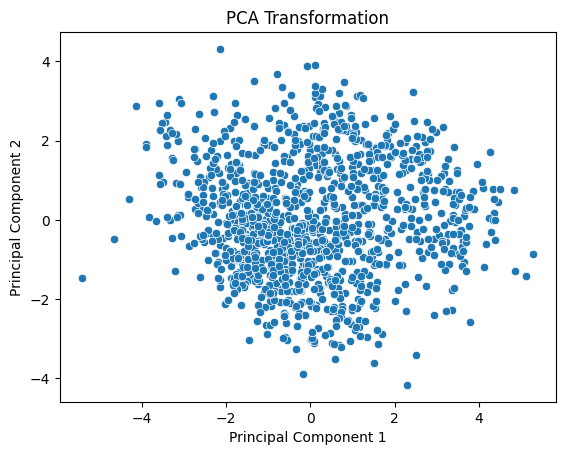

In [34]:
# Import required
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled_data)
# Apply PCA to reduce the dimensions to 2

# Plot the PCA-transformed data
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformation')
plt.show()



In [35]:
print(X_pca.shape)

(1451, 2)


Text(0.5, 1.0, 'PCA Transformation')

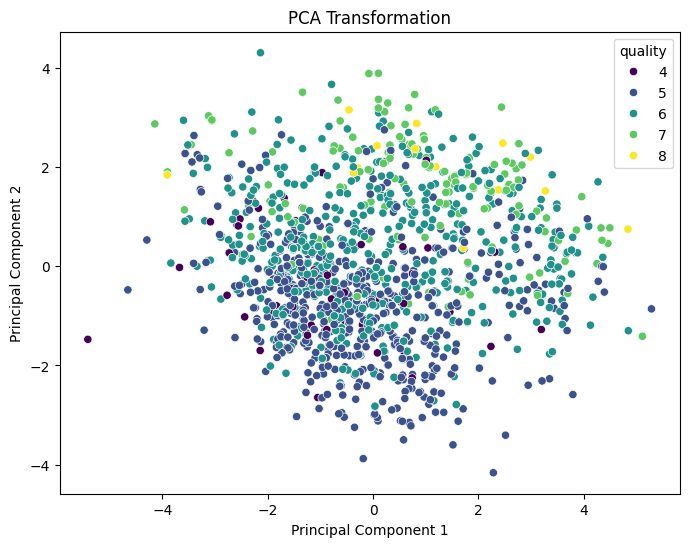

In [36]:
# Plot the PCA-transformed data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformation')

### Step 3: Apply Clustering

In [37]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [38]:
# k-means with some arbitrary k (number of clusters)
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_pca)

KMeans(n_clusters=3)

In [39]:
# Print k-means labels
kmeans.labels_

array([1, 0, 0, ..., 1, 1, 1], dtype=int32)

### 3.1 Find the Optimal Number of Clusters
- Elbow Method
- Silhoutte Analysis


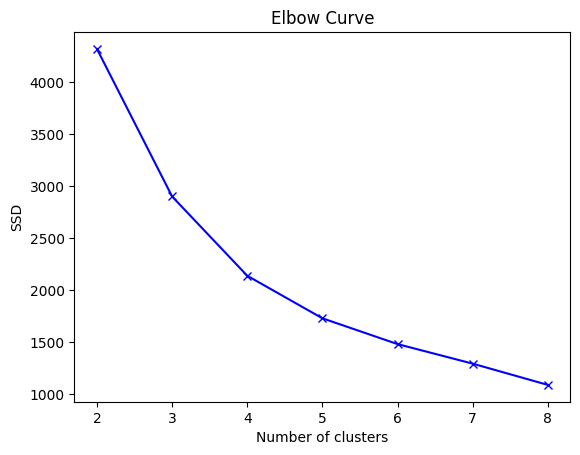

In [40]:
# Elbow-curve/SSD Method
# Using the Elbow Method to find the optimal number of clusters
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters)
    kmeans.fit(X_pca)
    ssd.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(range_n_clusters,ssd,'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.title('Elbow Curve')
plt.show()


k=4 may be a good choice

In [41]:
# silhouette analysis
# Initialize the range of clusters
n_range_clusters = [2,3,4,5,6,7,8]
# For every cluster value, find silhoutte score
for n_clusters in n_range_clusters:

    # Intialise kmeans
    kmeans = KMeans(n_clusters=n_clusters)

    # Fitting the kmeans model
    kmeans.fit(X_pca)

    # Predicting the clusters
    cluster_labels = kmeans.predict(X_pca)

    # Calculate & print silhouette score
    slt_score = silhouette_score(X_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {slt_score}")

For n_clusters = 2, the silhouette score is 0.3987748850414177
For n_clusters = 3, the silhouette score is 0.3635506923088114
For n_clusters = 4, the silhouette score is 0.3794933116422799
For n_clusters = 5, the silhouette score is 0.3605705657787403
For n_clusters = 6, the silhouette score is 0.3563892359000803
For n_clusters = 7, the silhouette score is 0.35624892585697193
For n_clusters = 8, the silhouette score is 0.3379388719523888


### 3.2 Build the final model with optimal 'k' value

In [42]:
# Final model with k=3
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_pca)

KMeans(n_clusters=3)

In [45]:
# Create a dataframe for the features with reduced dimensions - X_pca
x_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
# Add a column for storing the kmeans labels
x_pca_df['cluster_id'] = kmeans.labels_



In [46]:
# Checking a few values
x_pca_df.head(20)

,PC1,PC2,cluster_id
0,-1.768657,-0.944378,1
1,-0.939324,-2.171010,2
2,-0.810121,-1.316325,2
3,2.520156,-0.295195,0
4,-1.768657,-0.944378,1
5,-1.756946,-1.002661,1
6,-1.331461,-1.074799,2
7,-2.484041,0.238619,1
8,-1.126295,-0.131142,1
9,0.986671,-1.035394,2


In [47]:
x_pca_df['cluster_id'].unique()

array([1, 2, 0], dtype=int32)

In [48]:
x_pca_df['cluster_id'][0:30]

,cluster_id
0,1
1,2
2,2
3,0
4,1
5,1
6,2
7,1
8,1
9,2


<Axes: xlabel='PC1', ylabel='PC2'>

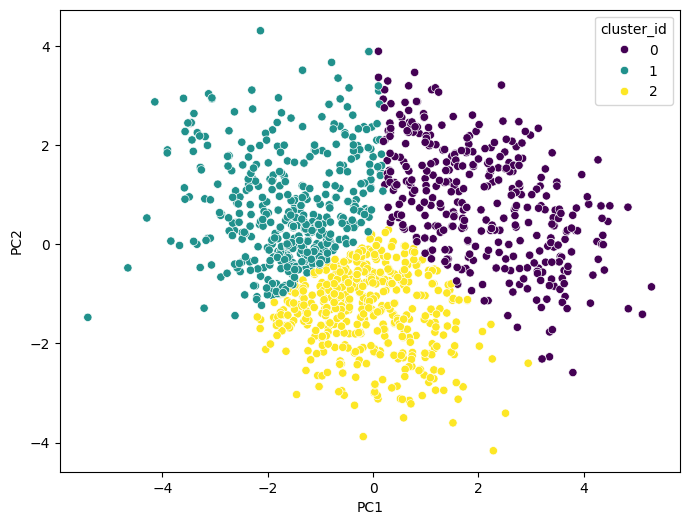

In [49]:
# Scatter plot of the two principal components to observe the cluster distribution
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_id', data=x_pca_df, palette='viridis')


## Section 2: Hierarchical Clustering


Hierarchical clustering is an **unsupervised learning algorithm** that builds a hierarchy of clusters, represented using a **dendrogram** (tree-like structure).


In [50]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

### Do hierarchical clustering via complete linkage

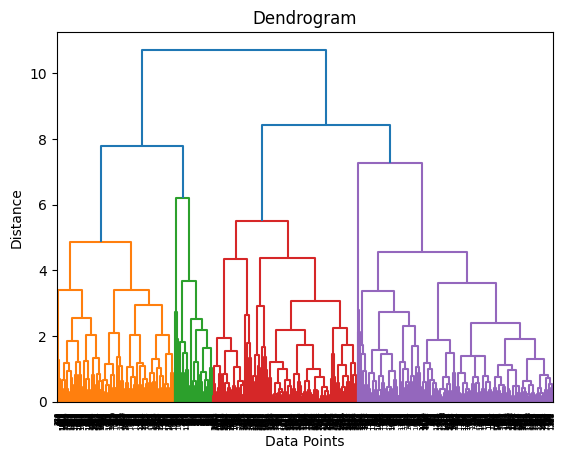

In [54]:
# complete linkage
# Generate the hierarchical clustering linkage matrix using 'complete' linkage method
sl_merging =linkage(X_pca,method='complete')


# Plot the dendrogram to visualize the hierarchical clustering
dendrogram(sl_merging)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


# Display the plot



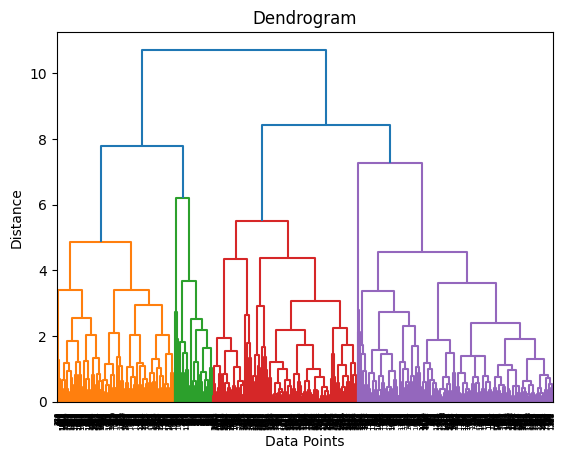

In [55]:
# Create complete linkage cluster labels choosing number of clusters to be 3
cl_merging=linkage(X_pca,method='complete',metric='euclidean')

dendrogram(cl_merging)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()



In [57]:
cl_merging_1=AgglomerativeClustering(n_clusters=3,linkage='complete')
cl_merging_1.fit_predict(X_pca)
dendrogram(cl_merging_1)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

TypeError: Linkage matrix 'Z' must contain doubles.

### Plot the hierarchical clustering graph

<Axes: xlabel='PC1', ylabel='PC2'>

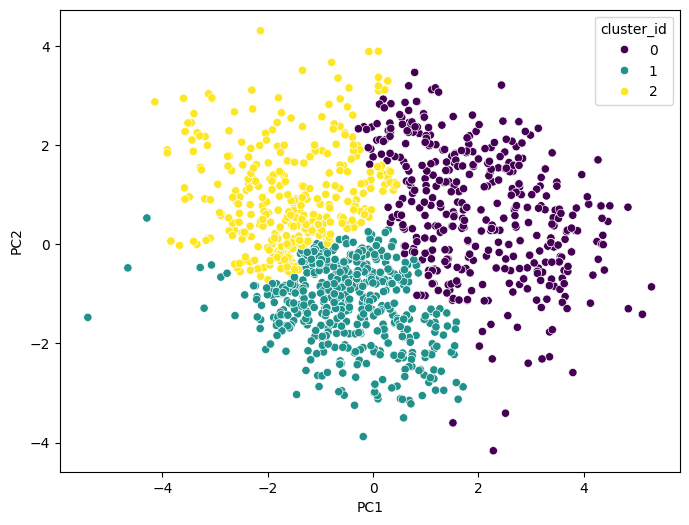

In [58]:
# Create a dataframe for features with reduced dimensions using pca
df_reduced = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
# Add a column to store the hierarchical clustering labels
df_reduced['cluster_id'] = cl_merging_1.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_id', data=df_reduced, palette='viridis')

## Section 3: Density based Clustering


Density-based clustering identifies clusters as dense regions of data points separated by areas of low density. It works well with arbitrary-shaped clusters and can detect outliers effectively.


In [59]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [60]:
# DBSCAN model
# Initialize the DBSCAN clustering model with eps = 0.5, min_samples=4
dbscan = DBSCAN(eps=0.5, min_samples=4)
# Fit the model
dbscan.fit(X_pca)


DBSCAN(min_samples=4)

In [61]:
# Print DBSCAN labels
# Noisy samples are given the label -1
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
# Print silhouette score
silhouette_score=silhouette_score(X_pca,dbscan.labels_)
print(silhouette_score)

0.39766119654938165


<Axes: xlabel='PC1', ylabel='PC2'>

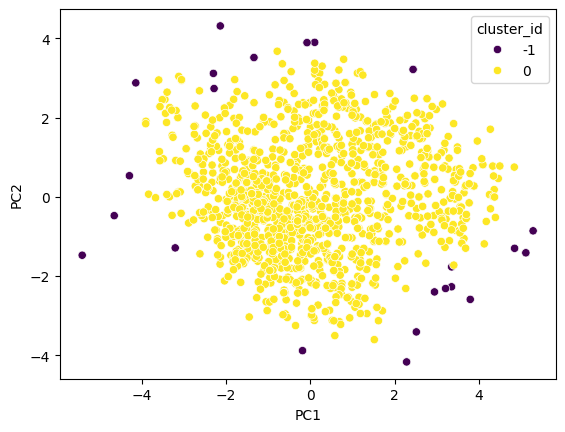

In [63]:
# Create a dataframe for features with reduced dimensions
df1=pd.DataFrame(X_pca,columns=['PC1','PC2'])
# Add a column to store the dbscan labels
df1['cluster_id']=dbscan.labels_


# scatter plot using the first two principal components to observe the cluster distribution
sns.scatterplot(x='PC1',y='PC2',hue='cluster_id',data=df1,palette='viridis')